In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

## Brain size

In [230]:
data = pd.read_table("brain.tsv")

In [231]:
def checkCorrBrain(label, genderList = ['Female', 'Male']):
    locData = data.loc[data['Gender'].isin(genderList)]
    cc, pv = pearsonr(locData[label], locData['MRI_Count'])
    print("Correlation coefficient of " + label + " and " + 
          "MRI_Count for " + ', '.join(genderList) + " is: " + str(cc))
    print("p-value is: " + str(pv) + "\n")    

In [232]:
for label in ['FSIQ', 'VIQ', 'PIQ']:
    checkCorrBrain(label)
    checkCorrBrain(label, ['Female'])
    checkCorrBrain(label, ['Male'])

Correlation coefficient of FSIQ and MRI_Count for Female, Male is: 0.3576409693690567
p-value is: 0.023468912626901678

Correlation coefficient of FSIQ and MRI_Count for Female is: 0.32569670049637045
p-value is: 0.16111577618907624

Correlation coefficient of FSIQ and MRI_Count for Male is: 0.4983691104171925
p-value is: 0.025319401349742716

Correlation coefficient of VIQ and MRI_Count for Female, Male is: 0.33747772802033543
p-value is: 0.033201762692926864

Correlation coefficient of VIQ and MRI_Count for Female is: 0.2549328529614766
p-value is: 0.2780396327901848

Correlation coefficient of VIQ and MRI_Count for Male is: 0.4131049601428286
p-value is: 0.07024063827644651

Correlation coefficient of PIQ and MRI_Count for Female, Male is: 0.3868173150245029
p-value is: 0.013674636036073246

Correlation coefficient of PIQ and MRI_Count for Female is: 0.3961571668684763
p-value is: 0.08378071936817758

Correlation coefficient of PIQ and MRI_Count for Male is: 0.5682370032144156
p-val

For male dependency is a bit higher, but there is no significant correlation between brain size and IQ

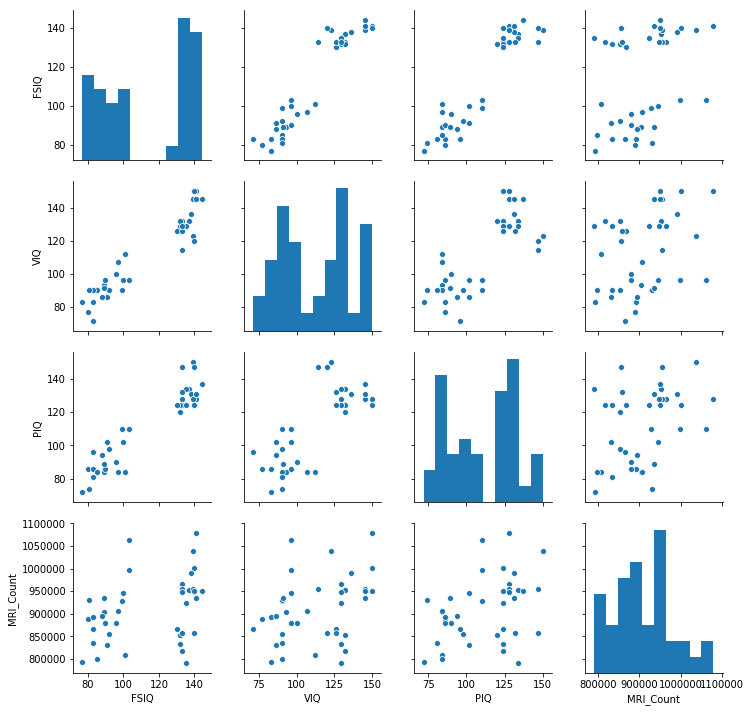

In [233]:
sns.pairplot(data)

## Car selection

In [234]:
data = pd.read_table("carprefs.tsv")

In [235]:
def checkCorrCarPrefs(label):
    cross_tab = pd.crosstab(data[label], data['Sex'])
    return  chi2_contingency(cross_tab)   

In [236]:
def plotHistCarPref(label, bins = 4):
    locData2 = data.loc[data['Sex'] == 2]
    sns.distplot(locData2[label], label='Men', bins = bins)
    locData1 = data.loc[data['Sex'] == 1]
    sns.distplot(locData1[label], label='Women', bins = bins)
    plt.legend()


In [237]:
df = pd.DataFrame(columns = ['Label', 'Chi2', 'p-value'])
i = 0
for label in list(data)[8:]:
    chi2, p, dof, expected = checkCorrCarPrefs(label)
    df.loc[i] = [label, chi2, p]
    i+=1
df = df.sort_values('Chi2', ascending=False)
df = df.reset_index(drop=True)
display(df)

,Label,Chi2,p-value
0,Safety,33.894370,2.085566e-07
1,Park,32.746600,3.642431e-07
2,Reason,24.033907,2.138796e-04
3,PreferCar,17.507848,5.555699e-04
4,AC/PS,12.198220,6.734089e-03
5,Perform,9.245212,2.620222e-02
6,Fuel,9.014145,2.910341e-02
7,Cost,8.666070,3.407647e-02
8,Car15K,7.721525,5.456630e-03
9,Reliable,6.492159,3.892652e-02


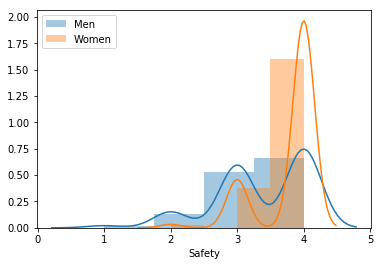

In [238]:
plotHistCarPref('Safety')

Safety is more important for women

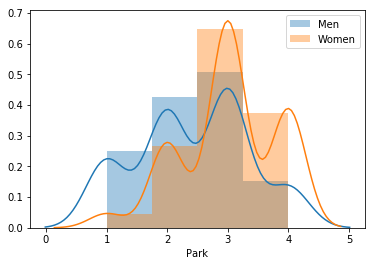

In [239]:
plotHistCarPref('Park')

Ease of parking is more important for women

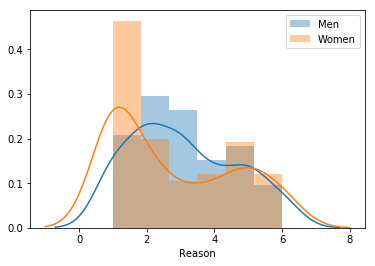

In [240]:
plotHistCarPref('Reason', 6)

1=safety, 2=reliability, 3=cost, 4=performance, 5=comfort, 6=looks

For women safety is main reason more often

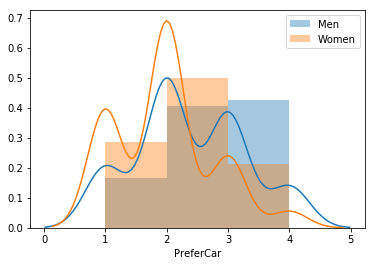

In [241]:
plotHistCarPref('PreferCar', 3)

Men prefer bigger cars

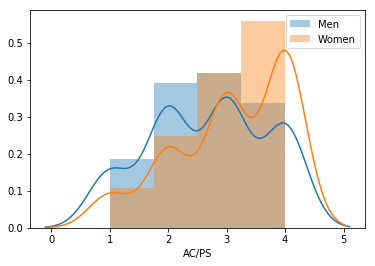

In [242]:
plotHistCarPref('AC/PS')

Conditioner and power steering is more important for women

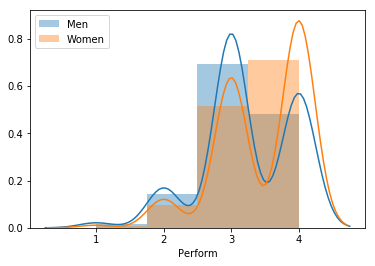

In [243]:
plotHistCarPref('Perform')

Performance is more important for women

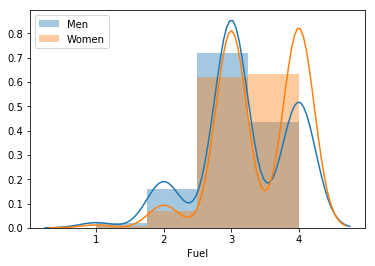

In [244]:
plotHistCarPref('Fuel')

Fuel consumption is more important for women